# Установка в среде google colab

## Установка библиотек

Необходимы нам библиотеки не предустановлены в этой среде.
Поэтому нам нужно будет их устанавливать, но это занимает не очень много времени. Примерно 5-10 минут.

Для начала узнаем версию CUDA, дальнейшие установки расчитаны на версию 10.1.

1) Установим pytorch через PIP   
2) Установим detecron2 из git репозитория

In [3]:
!nvidia-smi

Tue Dec 29 02:23:35 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4MB 18kB/s 
     |████████████████████████████████| 12.8MB 254kB/s 
     |████████████████████████████████| 7.6MB 7.9MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-sqrj8n0j
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-sqrj8n0j
     |████████████████████████████████| 276kB 7.4MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2-cp36-none-any.whl size=44576 sha256=09a68317205e8cc3aea418256a8c67b4d56c604d18cb25bc88caf2d139dc7ae2
  Stored in directory: /tmp/pip-ephem-wheel-cache-d5cyhsxu/wheels/48/53/79/3c6

'1.7.1+cu101'

In [5]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 9691 (delta 0), reused 5 (delta 0), pack-reused 9664
Receiving objects: 100% (9691/9691), 3.88 MiB | 25.30 MiB/s, done.
Resolving deltas: 100% (7104/7104), done.
Obtaining file:///content/detectron2_repo
     |████████████████████████████████| 2.2MB 7.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0
  Running setup.py develop for detectron2


## Сделаем тест работы detectron2 на тестовом изображении 

In [1]:
from detectron2.engine import DefaultPredictor
from detectron2.data import MetadataCatalog
from detectron2.config import get_cfg
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2 import model_zoo

from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import requests

In [2]:
# Load an image
res = requests.get("https://live.staticflickr.com/700/33224654191_fdaee2e3f1_c_d.jpg")
image = np.asarray(bytearray(res.content), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

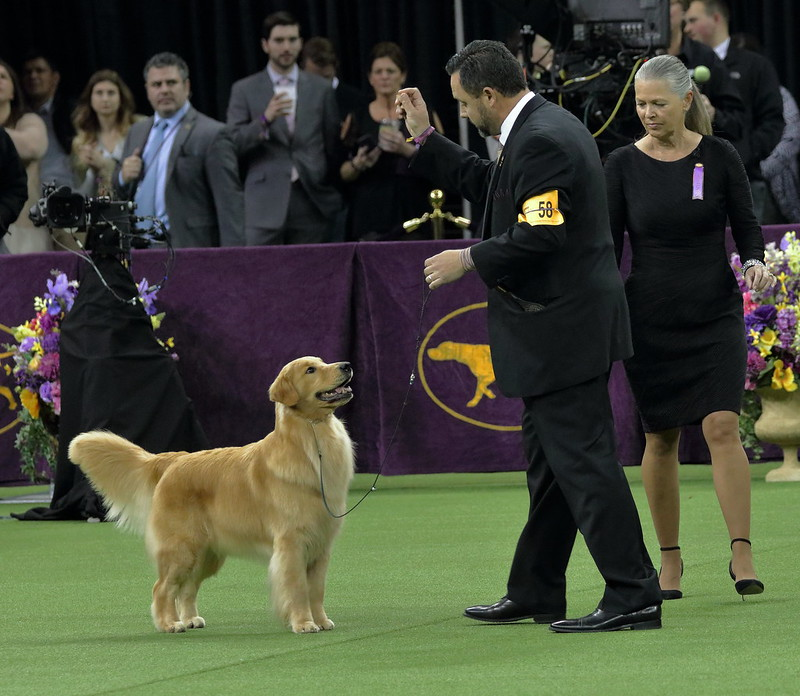

In [3]:
cv2_imshow(image)

Отдадим это обучение на обучение нейронной сети.

model_final_f6e8b1.pkl: 243MB [00:03, 65.3MB/s]                           
/content/detectron2_repo/detectron2/modeling/roi_heads/fast_rcnn.py:124: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


{'instances': Instances(num_instances=10, image_height=696, image_width=800, fields=[pred_boxes: Boxes(tensor([[381.5301,  37.9873, 660.5098, 633.0025],
        [609.0862,  52.3060, 778.6715, 608.7543],
        [ 76.1546, 342.9806, 350.8254, 637.9863],
        [116.5007,  50.8391, 225.4073, 244.8142],
        [212.0942,  12.9442, 342.5333, 248.1474],
        [339.8039,  41.2512, 438.5270, 242.1403],
        [682.8400,   1.2311, 785.6708, 182.6451],
        [ 70.0013,  67.1564, 141.3879, 201.0686],
        [  1.1377,  59.1209,  48.8566, 245.9817],
        [479.2893, 135.2387, 502.9640, 239.9862]], device='cuda:0')), scores: tensor([0.9983, 0.9974, 0.9959, 0.9919, 0.9891, 0.9586, 0.9503, 0.9474, 0.8453,
        0.8035], device='cuda:0'), pred_classes: tensor([ 0,  0, 16,  0,  0,  0,  0,  0,  0, 27], device='cuda:0')])}


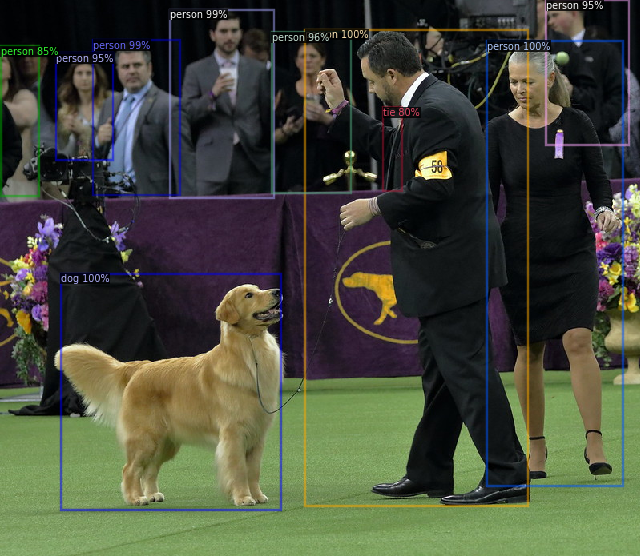

In [4]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml'))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.75 # Threshold
#cfg.MODEL.WEIGHTS = r"D:\MEDIA\Downloads\model_final_f6e8b1.pkl"
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl"
cfg.MODEL.DEVICE = "cuda" # cpu or cuda
#cfg.MODEL.DEVICE='cpu'

# Create predictor
predictor = DefaultPredictor(cfg)

# Make prediction
output = predictor(image)
print(output)
v = Visualizer(image[:, :, ::-1],
               scale=0.8,
               metadata=MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),
               instance_mode=ColorMode.IMAGE
               )
v = v.draw_instance_predictions(output["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

## Обучаем нашу модель

In [6]:
import os

from detectron2 import model_zoo
from detectron2.data.datasets import register_coco_instances
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer

### Регистрируем наш датасет

Предварительно загрузим файлы в среду google colab

In [7]:
register_coco_instances(name="HackRZHD", 
                        metadata={},
                        json_file="RZHD_data/annotations.json", 
                        image_root="RZHD_data/")

### Настраиваем модель нейронной сети

Берем за основу предобученную нейронную сеть `mask_rcnn_R_50_FPN_3x`, которую дообучим на наших примерах.  
Другие варианты можно посмотреть [тут](https://github.com/DGMaxime/detectron2-windows/blob/master/MODEL_ZOO.md)

In [8]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

Укажим использование нашего тренировочного набора

In [9]:
cfg.DATASETS.TRAIN = ("HackRZHD",)
cfg.DATASETS.TEST = ()

Укажем куда нужно сохранить натренированную модель

In [10]:
cfg.OUTPUT_DIR = "./HackRZHD_model"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

На чем тренировать Процессор или Видеокарта CUDA

In [11]:
cfg.MODEL.DEVICE='cuda'

Другие параметры модели

In [12]:
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4

## Начинаем тренировку

In [13]:
trainer = DefaultTrainer(cfg) 

[12/29 02:39:56 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

In [14]:
trainer.resume_or_load(resume=True)

model_final_f10217.pkl: 178MB [00:02, 85.6MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (5, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (5,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (16, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (16,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to

In [15]:
trainer.train()

[12/29 02:40:11 d2.engine.train_loop]: Starting training from iteration 0
[12/29 02:40:19 d2.utils.events]:  eta: 0:06:21  iter: 19  total_loss: 3.218  loss_cls: 1.676  loss_box_reg: 0.1747  loss_mask: 0.6915  loss_rpn_cls: 0.5358  loss_rpn_loc: 0.1287  time: 0.3888  data_time: 0.0379  lr: 4.9953e-06  max_mem: 2102M
[12/29 02:40:27 d2.utils.events]:  eta: 0:06:16  iter: 39  total_loss: 2.894  loss_cls: 1.507  loss_box_reg: 0.2144  loss_mask: 0.6892  loss_rpn_cls: 0.391  loss_rpn_loc: 0.09097  time: 0.3925  data_time: 0.0056  lr: 9.9902e-06  max_mem: 2148M
[12/29 02:40:36 d2.utils.events]:  eta: 0:06:13  iter: 59  total_loss: 2.443  loss_cls: 1.236  loss_box_reg: 0.2839  loss_mask: 0.6843  loss_rpn_cls: 0.1674  loss_rpn_loc: 0.1049  time: 0.4004  data_time: 0.0053  lr: 1.4985e-05  max_mem: 2269M
[12/29 02:40:44 d2.utils.events]:  eta: 0:06:11  iter: 79  total_loss: 2.161  loss_cls: 0.9505  loss_box_reg: 0.3323  loss_mask: 0.6789  loss_rpn_cls: 0.08934  loss_rpn_loc: 0.1007  time: 0.4050

## Итог

Модель в google colab была натренирована за 10 минут.  
В итоге мы получили файл `model_final.pth` который скачаем и будем использовать в дальнейшей работе.